<a href="https://colab.research.google.com/github/biotocharles/HFD/blob/main/NPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [21]:
!git clone https://github.com/biotocharles/HFD.git
%cd HFD


Cloning into 'HFD'...
/content/HFD


In [25]:
!mv /content/NPR.ipynb .


mv: cannot stat '/content/NPR.ipynb': No such file or directory


In [ ]:
pip install yfinance


In [ ]:
ticker = "RELIANCE.NS"
data = yf.download(ticker, period="1y", interval="1d")
series = data["Close"].values #closing values

/tmp/ipython-input-3198346458.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [ ]:
def gaussian_kernel(x):
  return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

NADARAYA WATSON ESTIMATOR
X_train: past lag vectors (matrix shape [n_samples, p])
y_train: past actual values (array length n_samples)
x_query: the lag vector you want to predict for (shape [p])
h: bandwidth (smoothness parameter)


In [ ]:
def nw_predict(X_train, y_train, x_query, h):
  diffs = X_train - x_query
  weights = np.prod(gaussian_kernel(diffs), axis = 1)
  if (weights.sum() == 0):
    return np.mean(y_train)
  return np.dot(weights.flatten(), y_train) / weights.sum()


In [ ]:
def build_lagged_series(series, p):
    X, y = [], []
    for t in range(p, len(series)):
        X.append(series[t-p:t])
        y.append(series[t])
    return np.array(X), np.array(y)


In [ ]:
p = 3
X, y = build_lagged_series(series, p)

In [ ]:
h = 5

In [ ]:
y_pred = []
for i in range(len(X)):
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i)
    y_pred.append(nw_predict(X_train, y_train, X[i], h))

y_pred = np.array(y_pred)

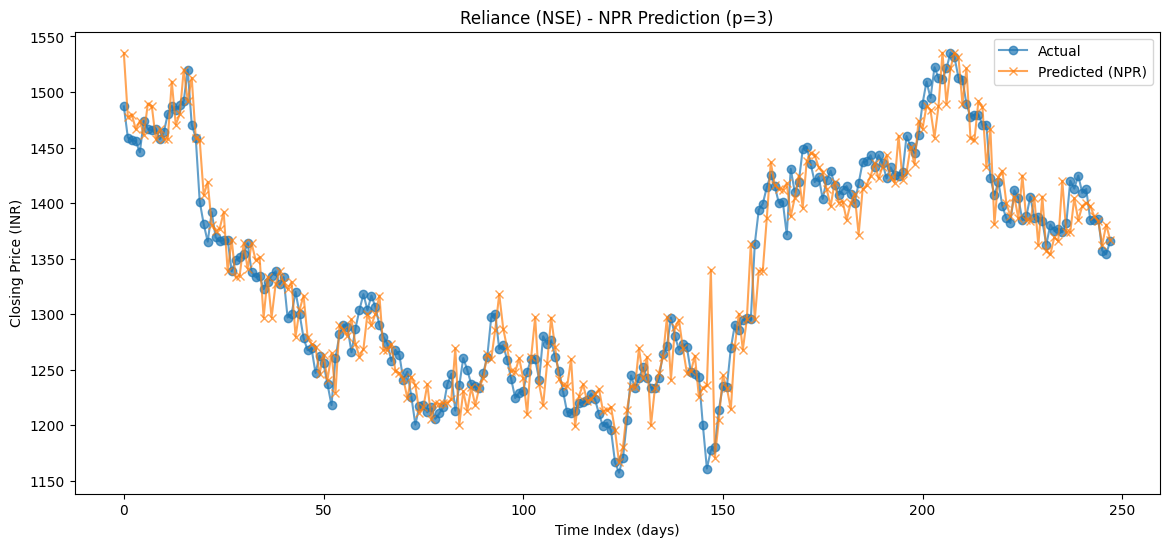

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y, label="Actual", marker='o', alpha=0.7)
plt.plot(y_pred, label="Predicted (NPR)", marker='x', alpha=0.7)
plt.title("Reliance (NSE) - NPR Prediction (p=3)")
plt.xlabel("Time Index (days)")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.show()